In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit,jit,prange
from sympy import *

# 隐函数曲线的绘制

$$
\begin{aligned}
&q_1 = -1,\quad (x_1,y_1) = (-2,0)
\\
&q_2 = 1,\quad (x_2,y_2) = (2,0)
\\
&\frac{q_1}{|x-x_1|}+\frac{q_2}{|x-x_2|} = V_0
\end{aligned}
$$
画出$V_0$ = 3,2,1,0,5的等势线


取计算间隔为$dt$，有微分（差分）
$$
dV = \frac{\partial V}{d x} dx + \frac{\partial V}{\partial y} dy = 0
\\
d{x} = +\frac{\partial V}{\partial y}d{t}
\\
d{y} = -\frac{\partial V}{\partial x}d{t}
$$


取$V_0 = 3$，有 

$$
\frac{-1}{|x+2|} + \frac{1}{|x-2|} = 3
$$

解的
$$
x_1 = \frac{4}{\sqrt{3}} \qquad x_2 = \frac{1}{3}(\sqrt{37}-1)
$$

In [2]:
ndim = 15000
q1 = -1
q2 = 1
dt = 10e-6
x1 = -2
x2 = 2

In [3]:
@njit("float64[:](float64[:])")
def im_fun(x_solve):
    global ndim, q1, q2, dt, x1, x2
    
    result = np.zeros(2*len(x_solve)*ndim)

    for j,xs in enumerate(x_solve):
        x = np.zeros(ndim)
        y = np.zeros(ndim)
        x[0] = xs
        y[0] = 0.

        for i in range(1,ndim):
            r1 = np.sqrt((x[i-1]-x1)**2+y[i-1]**2)
            r2 = np.sqrt((x[i-1]-x2)**2+y[i-1]**2)
            x[i] = x[i-1]+y[i-1]*(q1/r1**3+q2/r2**3)*dt
#             x[i] = x[i-1]+y[i-1]*(q1*r2**3+q2*r1**3)*dt
            # 下面用的是x[i]还是x[i-1]❓这有问题
            y[i] = y[i-1]-(q1*(x[i-1]-x1)/r1**3 + q2*(x[i-1]-x2)/r2**3)*dt
#             y[i] = y[i-1]-(q1*(x[i-1]-x1)*r2**3 + q2*(x[i-1]-x2)*r1**3)*dt

        result[j*ndim:(j+1)*ndim] = x
        result[(j+2)*ndim:(j+3)*ndim] = y

    return result

def cal_v(v):
    global ndim, q1, q2, dt, x1, x2

    tx = symbols('x')
    x_solve = solve(q1/sqrt((tx-x1)**2) + q2/sqrt((tx-x2)**2)-v, tx)
    x_solve = np.array(x_solve,dtype = 'float64')

    result = im_fun(x_solve)
    result_x = result[:2*ndim]
    result_y = result[-2*ndim:]
    
    return result_x,result_y

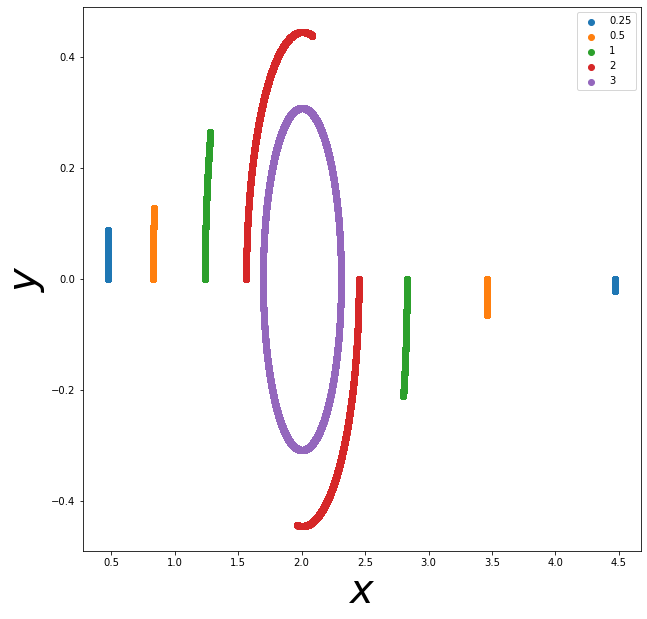

Wall time: 2.56 s


In [4]:
%%time

plt.figure(figsize=(10,10))
for v in [0.25, 0.5, 1, 2, 3]:
    result_x,result_y = cal_v(v)
    plt.scatter(result_x, result_y)

plt.legend([0.25, 0.5, 1, 2, 3])
plt.ylabel(r'$y$',fontsize=40)
plt.xlabel(r'$x$',fontsize=40)
plt.show()

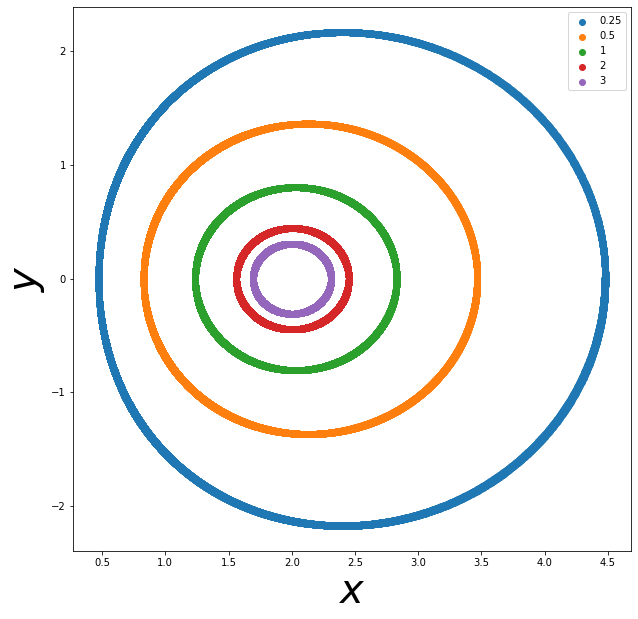

Wall time: 2.46 s


In [7]:
%%time
def cal_v(v):
    ndim = 15000
    q1 = -1
    q2 = 1
    dt = 10e-6
    x1 = -2
    x2 = 2

    tx = symbols('x')
    x_solve = solve(q1/sqrt((tx-x1)**2) + q2/sqrt((tx-x2)**2)-v, tx)

    result_x = np.zeros(len(x_solve)*ndim)
    result_y = np.zeros(len(x_solve)*ndim)

    for j,xs in enumerate(x_solve):
        x = np.zeros(ndim)
        y = np.zeros(ndim)
        x[0] = xs
        y[0] = 0.

        for i in range(1,ndim):
            r1 = np.sqrt((x[i-1]-x1)**2+y[i-1]**2)
            r2 = np.sqrt((x[i-1]-x2)**2+y[i-1]**2)
            x[i] = x[i-1]+y[i-1]*(q1*r2**3+q2*r1**3)*dt
            # 下面用的是新的x❓这有问题
            y[i] = y[i-1]-(q1*(x[i-1]-x1)*r2**3 + q2*(x[i-1]-x2)*r1**3)*dt

        
        # 此处x_solve内含有两个解，下面这么写是为了用一个列表保存两个解的所有迭代坐标
        result_x[j*ndim:(j+1)*ndim] = x
        result_y[j*ndim:(j+1)*ndim] = y
    return result_x,result_y


plt.figure(figsize=(10,10))
for v in [0.25, 0.5, 1, 2, 3]:
    result_x,result_y = cal_v(v)
    plt.scatter(result_x, result_y)

plt.legend([0.25, 0.5, 1, 2, 3])
plt.ylabel(r'$y$',fontsize=40)
plt.xlabel(r'$x$',fontsize=40)
plt.show()

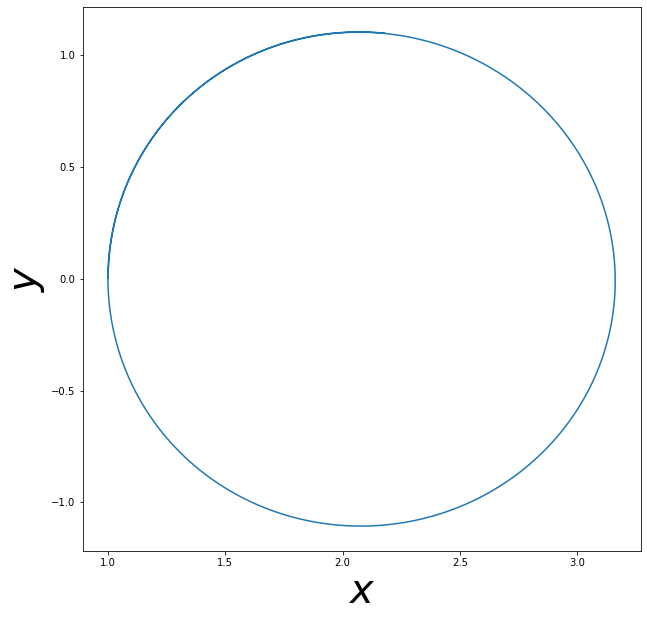

Wall time: 131 ms


In [10]:
%%time

ndim = 1500
x_list = np.zeros(ndim, dtype='float64')
y_list = np.zeros(ndim, dtype='float64')

q1 = -1
q2 = 1
dt = 10e-5

x1 = -2
x2 = 2

r1 = _
r2 = _

x = 1.
y = 0.

for i in range(ndim):
    r1 = np.sqrt((x-x1)**2+y**2)
    r2 = np.sqrt((x-x2)**2+y**2)
    dx = y*(q1*r2**3+q2*r1**3)*dt
#     dx = -y*(q1/r2**3+q2/r1**3)*dt
    x = x+dx
    dy = -(q1*(x-x1)*r2**3 + q2*(x-x2)*r1**3)*dt
#     dy = (q1*(x-x1)/r2**3 + q2*(x-x2)/r1**3)*dt
    y = y+dy
    x_list[i] = x
    y_list[i] = y
    
plt.figure(figsize=(10,10))
plt.plot(x_list[:], y_list[:])
plt.ylabel(r'$y$',fontsize=40)
plt.xlabel(r'$x$',fontsize=40)
plt.show()
